<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/nbsforslides/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy.stats import norm
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


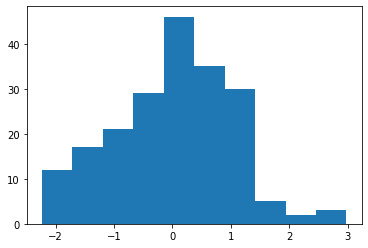

In [2]:
# set a seed to make this reproducible
# (every time i run it i get the same result even if i use random)
np.random.seed()
# Gaussian (normally) distribute data, mean 0, sdtev 1
data = np.random.randn(200)
y, x, p = pl.hist(data)

In [3]:
#fit a gaussian to the data
mean,std = sp.stats.norm.fit(data)
mean, std

(0.03563078024777911, 1.0136989146981574)

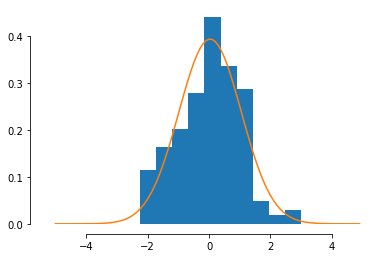

In [4]:
y, x, p = pl.hist(data, density=True)
xr = np.arange(-5, 5, 0.1)
pl.plot(xr, sp.stats.norm.pdf(xr, loc=mean, scale=std))
sns.despine(offset=10, trim=True);


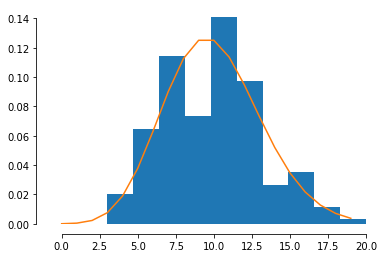

In [5]:
#Poisson distribution with lambda = 10
data = np.random.poisson(10, 200)
yp, xp, p = pl.hist(data, bins=10, density=True)
pl.plot(range(20), sp.stats.poisson.pmf(range(20), mu=10))
sns.despine(offset=10, trim=True);


mean 2.835
median 2.835


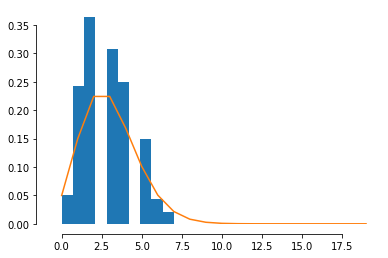

In [6]:
#poisson distribution with lambda=3
mu = 3
data = np.random.poisson(mu, 200)
yp, xp, p = pl.hist(data, bins=10, density=True)
pl.plot(range(20), sp.stats.poisson.pmf(range(20), mu=mu))
sns.despine(offset=10, trim=True);
print("mean", data.mean())
print("median", data.mean())

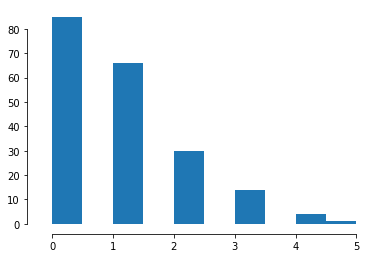

In [7]:
#poisson distribution with lambda=1
data = np.random.poisson(1, 200)
yp, xp, p = pl.hist(data, bins=10)
sns.despine(offset=10, trim=True);


2.003786755790107 2.0115809570657177 0.8856382988765606 0.8553115546827484


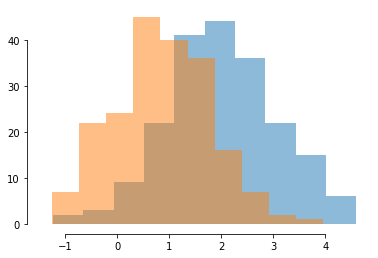

In [8]:
#two gaussian distribution with slightly different mean, as different as the standard deviation
np.random.seed(123)
data1 = np.random.randn(200) + 2
y1, x1, p = pl.hist(data1, alpha=0.5)
data2 = np.random.randn(200) + 1
y2, x2, p = pl.hist(data2, alpha=0.5)
sns.despine(offset=10, trim=True);
print(data1.mean(), np.median(data1), data2.mean(), np.median(data2))

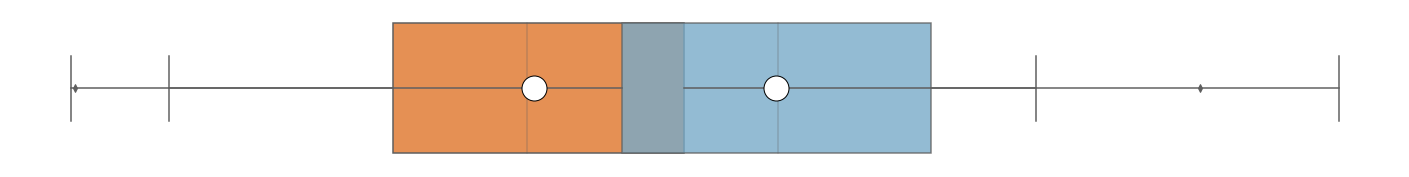

In [9]:
ax = plt.figure(figsize=(25,3)).add_subplot(111)
sns.boxplot(data2, palette="Oranges", showmeans=True,
            #boxprops={"alpha":0.8, },
            medianprops = dict(alpha=0.3),
            meanprops={"marker":"o",
                       "markersize":"25",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      })
sns.boxplot(data1, palette="Blues", showmeans=True,
            boxprops={"alpha":0.8, },
            medianprops = dict(alpha=0.3),
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"25"});
ax.axis('off');

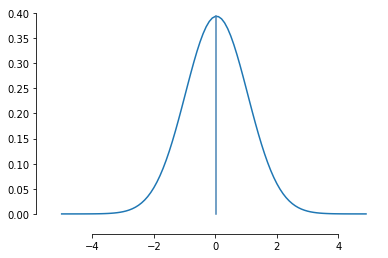

In [15]:
xr = np.arange(-5, 5, 0.1)
pl.plot(xr, sp.stats.norm.pdf(xr, loc=mean, scale=std))
pl.plot([mean, mean], 
                [0, sp.stats.norm.pdf([mean], loc=mean, scale=std)], c="SteelBlue")

sns.despine(offset=10, trim=True);

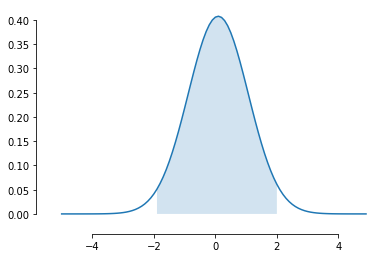

In [20]:
xr = np.arange(-5, 5, 0.1)
pl.plot(xr, sp.stats.norm.pdf(xr, loc=mean, scale=std))
twos = (xr>-2) * (xr<2)
pl.fill_between(xr[twos], 
                sp.stats.norm.pdf(xr, loc=mean, scale=std)[twos], alpha=0.2)

sns.despine(offset=10, trim=True);

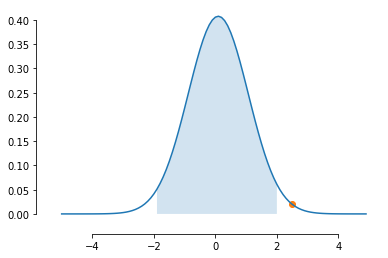

In [18]:
xr = np.arange(-5, 5, 0.1)
pl.plot(xr, sp.stats.norm.pdf(xr, loc=mean, scale=std))
twos = (xr>-2) * (xr<2)
pl.fill_between(xr[twos], 
                sp.stats.norm.pdf(xr, loc=mean, scale=std)[twos], alpha=0.2)

pl.scatter([2.5], sp.stats.norm.pdf([2.5], loc=mean, scale=std))
sns.despine(offset=10, trim=True);



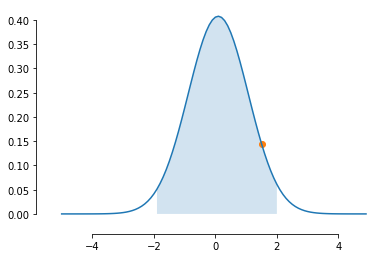

In [19]:
xr = np.arange(-5, 5, 0.1)
pl.plot(xr, sp.stats.norm.pdf(xr, loc=mean, scale=std))
twos = (xr>-2) * (xr<2)
pl.fill_between(xr[twos], 
                sp.stats.norm.pdf(xr, loc=mean, scale=std)[twos], alpha=0.2)

pl.scatter([1.5], sp.stats.norm.pdf([1.5], loc=mean, scale=std))
sns.despine(offset=10, trim=True);

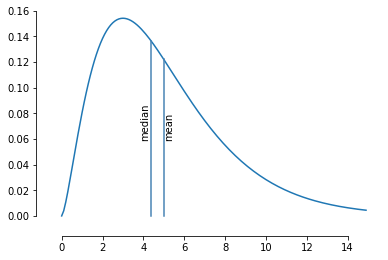

In [34]:
xr = np.arange(0, 15, 0.1)
pl.plot(xr, sp.stats.chi2.pdf(xr, df=5))
mean = 5
median = mean * (1-2/(9*mean))**3

pl.plot([mean, mean], 
                [0, sp.stats.chi2.pdf([mean], df=5)], c="SteelBlue")
pl.text(mean, 0.06, "mean", rotation=90)
pl.text(median-0.5, 0.06, "median", rotation=90)
pl.plot([median, median], 
                [0, sp.stats.chi2.pdf([median], df=5)], c="SteelBlue")

sns.despine(offset=10, trim=True);

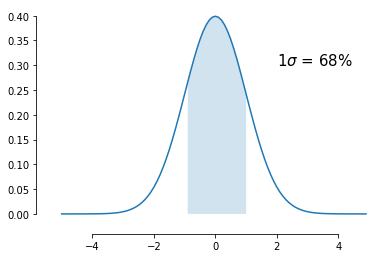

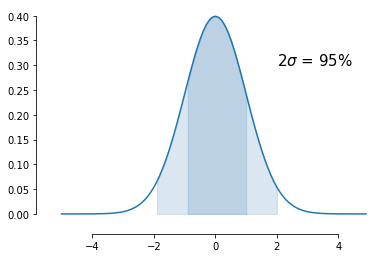

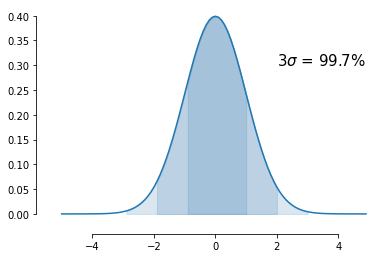

In [42]:
xr = np.arange(-5, 5, 0.1)
twos = (xr>-2) * (xr<2)
ones = (xr>-1) * (xr<1)
threes = (xr>-3) * (xr<3)
pl.figure()
pl.plot(xr, sp.stats.norm.pdf(xr, loc=0, scale=1))

pl.fill_between(xr[ones], 
                sp.stats.norm.pdf(xr, loc=0, scale=1)[ones], alpha=0.2)
pl.text(2, 0.3, r"1$\sigma$ = 68%", fontsize=15)
sns.despine(offset=10, trim=True);

pl.figure()
pl.plot(xr, sp.stats.norm.pdf(xr, loc=0, scale=1))

pl.fill_between(xr[ones], 
                sp.stats.norm.pdf(xr, loc=0, scale=1)[ones], 
                alpha=0.2, color="SteelBlue")
pl.fill_between(xr[twos], 
                sp.stats.norm.pdf(xr, loc=0, scale=1)[twos], 
                alpha=0.2, color="SteelBlue")
pl.text(2, 0.3, r"2$\sigma$ = 95%", fontsize=15)


sns.despine(offset=10, trim=True);

pl.figure()
pl.plot(xr, sp.stats.norm.pdf(xr, loc=0, scale=1))

pl.fill_between(xr[ones], 
                sp.stats.norm.pdf(xr, loc=0, scale=1)[ones], 
                alpha=0.2, color="SteelBlue")
pl.fill_between(xr[twos], 
                sp.stats.norm.pdf(xr, loc=0, scale=1)[twos], 
                alpha=0.2, color="SteelBlue")
pl.fill_between(xr[threes], 
                sp.stats.norm.pdf(xr, loc=0, scale=1)[threes], 
                alpha=0.2, color="SteelBlue")
pl.text(2, 0.3, r"3$\sigma$ = 99.7%", fontsize=15)


sns.despine(offset=10, trim=True);

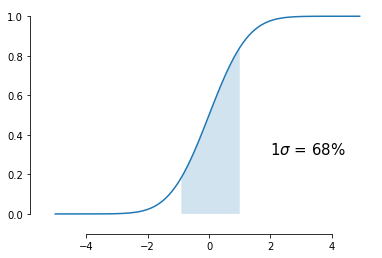

In [43]:
xr = np.arange(-5, 5, 0.1)
twos = (xr>-2) * (xr<2)
ones = (xr>-1) * (xr<1)
threes = (xr>-3) * (xr<3)
pl.figure()
pl.plot(xr, sp.stats.norm.cdf(xr, loc=0, scale=1))

pl.fill_between(xr[ones], 
                sp.stats.norm.cdf(xr, loc=0, scale=1)[ones], alpha=0.2)
pl.text(2, 0.3, r"1$\sigma$ = 68%", fontsize=15)
sns.despine(offset=10, trim=True);
